In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold


In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/Sneha8501/ML/main/Netflix_title_final.csv')
df.head()

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,release_year,duration,rating
0,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",TV-14,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,81193313,2019,60,6.3
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",G,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,81197050,2019,67,7.2
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",TV-14,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,81213894,2019,135,7.2
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",TV-14,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,81082007,2019,106,6.3
4,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",TV-Y,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,80213643,2019,60,7.7


In [69]:
fs=df.copy()
fs.shape

(985, 13)

In [70]:
label_encoder = preprocessing.LabelEncoder()
for column in fs:
  fs[column]= label_encoder.fit_transform(fs[column])

In [71]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(fs)

VarianceThreshold(threshold=0)

In [72]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [73]:
constant_columns=[column for column in fs.columns if column not in fs.columns[var_thres.get_support()]]
print(len(constant_columns))
constant_columns

0


[]

In [74]:
df.drop(constant_columns,axis=1,inplace=True)
df.shape

(985, 13)

In [75]:
df = df.T
print(df.duplicated().sum())
df = df.T

0


In [76]:
fs.corr()

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,release_year,duration,rating
title,1.000000,0.002300,0.074846,0.020655,0.005145,0.018827,-0.034812,0.060331,-0.007337,-0.092970,-0.073743,0.062053,-0.012732
director,0.002300,1.000000,-0.044015,-0.012502,-0.021517,0.111823,0.096033,0.001448,0.386032,0.052112,0.021618,-0.224746,-0.040688
cast,0.074846,-0.044015,1.000000,-0.033956,-0.010441,0.008963,0.034817,-0.023193,0.003884,0.047997,-0.008971,0.063190,0.027670
country,0.020655,-0.012502,-0.033956,1.000000,0.059006,-0.114396,0.006537,0.044260,0.047698,-0.272086,-0.169149,-0.180636,0.001502
date_added,0.005145,-0.021517,-0.010441,0.059006,1.000000,-0.072702,-0.071701,-0.035813,-0.074119,0.021988,-0.052177,0.090292,-0.031433
rated by,0.018827,0.111823,0.008963,-0.114396,-0.072702,1.000000,0.268592,-0.007346,0.227355,0.294901,0.253872,-0.122537,-0.000689
listed_in,-0.034812,0.096033,0.034817,0.006537,-0.071701,0.268592,1.000000,-0.047119,0.272793,0.237928,0.211475,-0.262196,0.007596
description,0.060331,0.001448,-0.023193,0.044260,-0.035813,-0.007346,-0.047119,1.000000,0.000238,-0.106223,-0.073769,-0.074531,-0.020373
type,-0.007337,0.386032,0.003884,0.047698,-0.074119,0.227355,0.272793,0.000238,1.000000,0.078056,0.072817,-0.459747,-0.012297
show_id,-0.092970,0.052112,0.047997,-0.272086,0.021988,0.294901,0.237928,-0.106223,0.078056,1.000000,0.643977,-0.183813,0.017506


In [77]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(fs, 0.4)
len(set(corr_features))

2

In [78]:
corr_features

{'duration', 'release_year'}

In [79]:
df.drop(corr_features, axis=1, inplace = True)
df.shape

(985, 11)

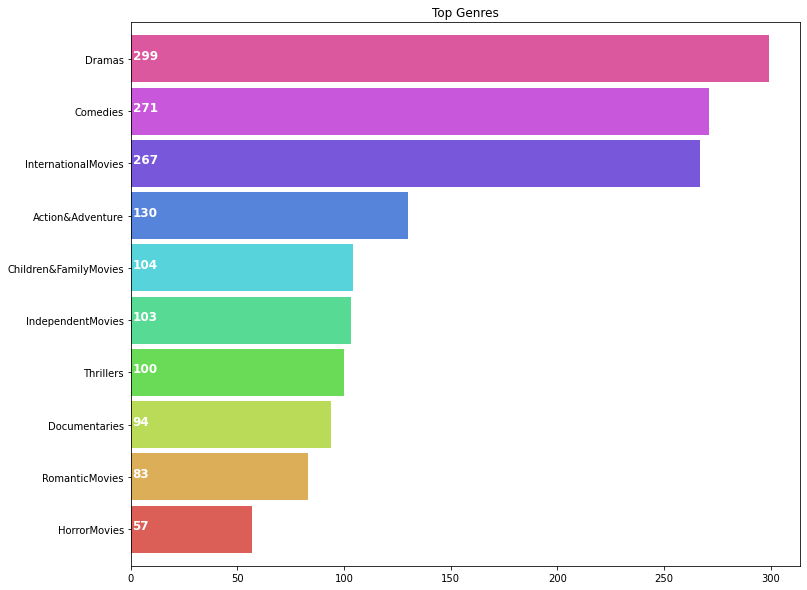

In [80]:
df['listed_in'] = df['listed_in'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['listed_in'] = df['listed_in'].str.split(',')

plt.subplots(figsize=(12,10))
list1 = []
for i in df['listed_in']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [81]:
for i,j in zip(df['listed_in'],df.index):
    list2=[]
    list2=i
    list2.sort()
    df.loc[j,'listed_in']=str(list2)
df['listed_in'] = df['listed_in'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['listed_in'] = df['listed_in'].str.split(',')
genreList = []
for index, row in df.iterrows():
    listed_in = row["listed_in"]
    
    for genre in listed_in:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

df['genres_bin'] = df['listed_in'].apply(lambda x: binary(x))
df['genres_bin'].head()

0    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [82]:
df['cast'] = df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df['cast'] = df['cast'].str.split(',')

for i,j in zip(df['cast'],df.index):
    list2 = []
    list2 = i[:4]
    df.loc[j,'cast'] = str(list2)
df['cast'] = df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast'] = df['cast'].str.split(',')
for i,j in zip(df['cast'],df.index):
    list2 = []
    list2 = i
    list2.sort()
    df.loc[j,'cast'] = str(list2)
df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

castList = []
for index, row in df.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

df['cast_bin'] = df['cast'].apply(lambda x: binary(x))
df['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...
2    [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...
3    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...
4    [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, ...
Name: cast_bin, dtype: object

In [83]:
df['director'] = df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
df['director'] = df['director'].str.split(',')
def xstr(s):
    if s is None:
        return ''
    return str(s)
df['director'] = df['director'].apply(xstr)

directorList=[]
for i in df['director']:
    if i not in directorList:
        directorList.append(i)

def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

df['director_bin'] = df['director'].apply(lambda x: binary(x))
df['director_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: director_bin, dtype: object

In [84]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df['rated by'] = df['rated by'].apply(xstr)

ratedbyList=[]
for i in df['rated by']:
    if i not in ratedbyList:
        ratedbyList.append(i)

def binary(ratedby_list):
    binaryList = []  
    for rated in ratedbyList:
        if rated in ratedby_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

df['rated by_bin'] = df['rated by'].apply(lambda x: binary(x))
df['rated by_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Name: rated by_bin, dtype: object

In [85]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df['country'] = df['country'].apply(xstr)

countryList=[]
for i in df['country']:
    if i not in countryList:
        countryList.append(i)

def binary(country_list):
    binaryList = []  
    for count in countryList:
        if count in country_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

df['country_bin'] = df['country'].apply(lambda x: binary(x))
df['country_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: country_bin, dtype: object

In [86]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df['type'] = df['type'].apply(xstr)

typeList=[]
for i in df['type']:
    if i not in typeList:
        typeList.append(i)

def binary(type_list):
    binaryList = []  
    for ty in typeList:
        if ty in type_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

df['type_bin'] = df['type'].apply(lambda x: binary(x))
df['type_bin'].head()

0    [1, 0]
1    [0, 1]
2    [0, 1]
3    [0, 1]
4    [1, 0]
Name: type_bin, dtype: object

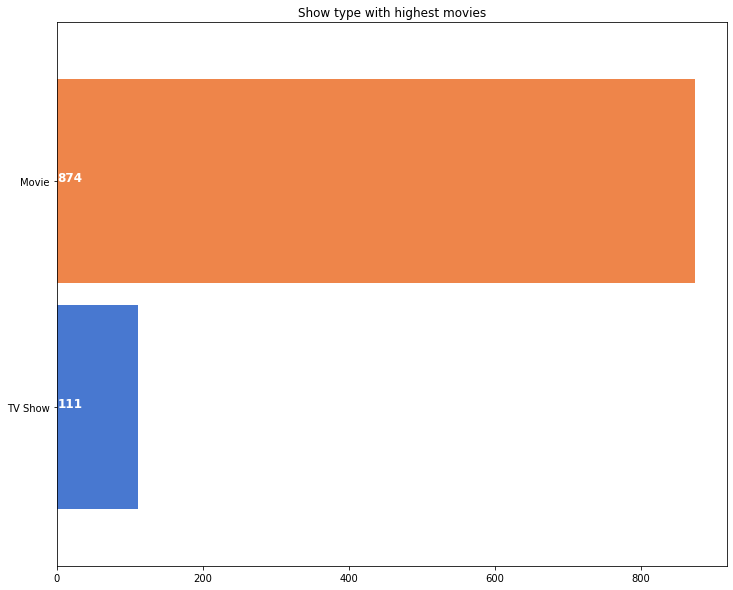

In [87]:
plt.subplots(figsize=(12,10))
ax = df[df['type']!=''].type.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(df[df['type']!=''].type.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Show type with highest movies')
plt.show()

In [88]:
df.head()

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,rating,genres_bin,cast_bin,director_bin,rated by_bin,country_bin,type_bin
0,Chocolate - 1 Season,['TokaMcBaror'],"HaJi-won,JangSeung-jo,KangBu-ja,YoonKye-sang",South Korea,"November 30, 2019",TV-14,"[InternationalTVShows, KoreanTVShows, Romantic...",Brought together by meaningful meals in the pa...,TV Show,81193313,6.3,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
1,Guatemala: Heart of the Mayan World,"['LuisAra', 'IgnacioJaunsolo']",ChristianMorales,Unknown,"November 30, 2019",G,"[Documentaries, InternationalMovies]","From Sierra de las Minas to Esquipulas, explor...",Movie,81197050,7.2,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
2,The Zoya Factor,['AbhishekSharma'],"DulquerSalmaan,SanjayKapoor,SikanderKher,Sonam...",India,"November 30, 2019",TV-14,"[Comedies, Dramas, InternationalMovies]",A goofy copywriter unwittingly convinces the I...,Movie,81213894,7.2,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
3,Atlantics,['MatiDiop'],"AmadouMbow,IbrahimaTraore,MamaSane,NicoleSougou","France, Senegal, Belgium","November 29, 2019",TV-14,"[Dramas, IndependentMovies, InternationalMovies]","Arranged to marry a rich man, young Ada is cru...",Movie,81082007,6.3,"[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1]"
4,Chip and Potato - 2 Seasons,['FrankOz'],"AbigailOliver,AndreaLibman,BrianDobson,BrianaB...","Canada, United Kingdom","November 27, 2019",TV-Y,[KidsTV],"Lovable pug Chip starts kindergarten, makes ne...",TV Show,80213643,7.7,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"


In [89]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = df.iloc[movieId1]
    b = df.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)

    ratedA = a['rated by_bin']
    ratedB = b['rated by_bin']
    ratedDistance = spatial.distance.cosine(ratedA, ratedB)

    countryA = a['country_bin']
    countryB = b['country_bin']
    countryDistance = spatial.distance.cosine(countryA, countryB)

    typeA = a['type_bin']
    typeB = b['type_bin']
    typeDistance = spatial.distance.cosine(typeA, typeB)
     
    l=[genreDistance,directDistance,scoreDistance,ratedDistance,countryDistance,typeDistance]
    m = min(l)
    min_index = l.index(m)
    
    return genreDistance + directDistance + scoreDistance + ratedDistance + countryDistance + typeDistance , min_index

In [90]:
Similarity(3,160) #checking similarity between any 2 random movies

(4.3907282041550575, 5)

In [91]:
print(df.iloc[3])
print(df.iloc[160])

title                                                   Atlantics
director                                             ['MatiDiop']
cast              AmadouMbow,IbrahimaTraore,MamaSane,NicoleSougou
country                                  France, Senegal, Belgium
date_added                                      November 29, 2019
rated by                                                    TV-14
listed_in        [Dramas, IndependentMovies, InternationalMovies]
description     Arranged to marry a rich man, young Ada is cru...
type                                                        Movie
show_id                                                  81082007
rating                                                        6.3
genres_bin      [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin        [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...
director_bin    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
rated by_bin                       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
country_bi

In [92]:
new_id = list(range(0,df.shape[0]))
df['new_id']=new_id
df=df[['show_id','new_id','title','listed_in','genres_bin','rating','cast','cast_bin','director','director_bin','type','type_bin','country','country_bin','rated by','rated by_bin']]
df.head()

,show_id,new_id,title,listed_in,genres_bin,rating,cast,cast_bin,director,director_bin,type,type_bin,country,country_bin,rated by,rated by_bin
0,81193313,0,Chocolate - 1 Season,"[InternationalTVShows, KoreanTVShows, Romantic...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.3,"HaJi-won,JangSeung-jo,KangBu-ja,YoonKye-sang","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",['TokaMcBaror'],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV Show,"[1, 0]",South Korea,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV-14,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,81197050,1,Guatemala: Heart of the Mayan World,"[Documentaries, InternationalMovies]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.2,ChristianMorales,"[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...","['LuisAra', 'IgnacioJaunsolo']","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Movie,"[0, 1]",Unknown,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",G,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,81213894,2,The Zoya Factor,"[Comedies, Dramas, InternationalMovies]","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.2,"DulquerSalmaan,SanjayKapoor,SikanderKher,Sonam...","[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",['AbhishekSharma'],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Movie,"[0, 1]",India,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV-14,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,81082007,3,Atlantics,"[Dramas, IndependentMovies, InternationalMovies]","[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",6.3,"AmadouMbow,IbrahimaTraore,MamaSane,NicoleSougou","[0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...",['MatiDiop'],"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Movie,"[0, 1]","France, Senegal, Belgium","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",TV-14,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,80213643,4,Chip and Potato - 2 Seasons,[KidsTV],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",7.7,"AbigailOliver,AndreaLibman,BrianDobson,BrianaB...","[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, ...",['FrankOz'],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV Show,"[1, 0]","Canada, United Kingdom","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",TV-Y,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"


In [93]:
data = pd.DataFrame(columns=['Show id','Title','Genre','Rating','Cast','Director','Show type','Country','Rated by','Reason'])

In [94]:
import operator
def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = df[df['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.title.values[0])

    def getNeighbors(baseMovie, K):
        distances = []
        reason_list =[]
    
        for index, movie in df.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist,reason = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
                reason_list.append(reason)
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors,reason_list
        
    K = 10
    avgRating = 0
    reason=[]
    neighbors,rea = getNeighbors(new_movie, K)
    for i in range(0,len(rea)):
        if rea[i] == 0:
            reason.append('Due to commanality in genre')
        elif rea[i] == 1:
            reason.append('Due to commanality in director')
        elif rea[i] == 2:
            reason.append('Due to commanality in cast')
        elif rea[i] == 3:
            reason.append('Due to commanality in rated by')
        elif rea[i] == 4:
            reason.append('Due to commanality in country')
        else:
            reason.append('Due to commanality in the type of show')
  
    print('\nRecommended Movies: \n')
    z=0
    for neighbor in neighbors:
        avgRating = avgRating+df.iloc[neighbor[0]][5]  
        #print("Title : "+df.iloc[neighbor[0]][2]+"\tGenere : "+str(df.iloc[neighbor[0]][3]).strip('[]').replace(' ','')+"\tRating : "+str(df.iloc[neighbor[0]][5]))
        #data.loc[z,'Show id']=df.iloc[neighbor[0]][0]
        data.loc[z,'Title']=df.iloc[neighbor[0]][2]
        data.loc[z,'Genre']=str(df.iloc[neighbor[0]][3]).strip('[]').replace(' ','')
        data.loc[z,'Rating']=df.iloc[neighbor[0]][5]
        data.loc[z,'Cast']=str(df.iloc[neighbor[0]][6]).strip('[]').replace(' ','')
        data.loc[z,'Director']=str(df.iloc[neighbor[0]][8]).strip('[]').replace(' ','')
        #data.loc[z,'Show type']=str(df.iloc[neighbor[0]][10]).strip('[]').replace(' ','')
        #data.loc[z,'Country']=str(df.iloc[neighbor[0]][12]).strip('[]').replace(' ','')
        #data.loc[z,'Rated by']=str(df.iloc[neighbor[0]][14]).strip('[]').replace(' ','')
        data.loc[z,'Reason']=reason[z]
        z=z+1
    avgRating = avgRating/K
    return data,avgRating,new_movie
    

In [95]:
data,avgRating,new_movie = predict_score('Atlantics')
data.head(10)

Selected Movie:  Atlantics

Recommended Movies: 



,Show id,Title,Genre,Rating,Cast,Director,Show type,Country,Rated by,Reason
0,NaN,The Man Without Gravity,"'Dramas','InternationalMovies'",9.1,"ElenaCotta,ElioGermano,MichelaCescon,SilviaDAmico",'MarcoBonfanti',NaN,NaN,NaN,Due to commanality in rated by
1,NaN,Saavat,"'Dramas','IndependentMovies','InternationalMov...",7.8,"MilindShirole,ShitanshuKumarSharad,Shwetambari...",'SaurabhSinha',NaN,NaN,NaN,Due to commanality in the type of show
2,NaN,300 Miles to Heaven,"'Dramas','InternationalMovies'",8,"AdriannaBiedrzyńska,AdriannaBiedrzyńska,Andrze...",'MaciejDejczer',NaN,NaN,NaN,Due to commanality in rated by
3,NaN,Saawan,"'Dramas','IndependentMovies','InternationalMov...",7.4,"ArifBahlim,KaramHussain,NajibaFaiz,SaleemMairaj",'FarhanAlam',NaN,NaN,NaN,Due to commanality in cast
4,NaN,Jonaki,"'Dramas','IndependentMovies','InternationalMov...",7.3,"JimSarbh,LolitaChatterjee,RatnabaliBhattacharj...",'AdityaVikramSengupta',NaN,NaN,NaN,Due to commanality in rated by
5,NaN,Hamid,"'Dramas','IndependentMovies','InternationalMov...",9.8,"RasikaDugal,SumitKaul,TalhaArshadReshi,VikasKumar",'AijazKhan',NaN,NaN,NaN,Due to commanality in the type of show
6,NaN,Do Paise Ki Dhoop Chaar Aane Ki Baarish,"'Dramas','IndependentMovies','InternationalMov...",7.7,"ManishaKoirala,RajendraGupta,RajitKapoor,Sanaj...",'DeeptiNaval',NaN,NaN,NaN,Due to commanality in rated by
7,NaN,Master Z: The Ip Man Legacy,"'Dramas','IndependentMovies','InternationalMov...",7.8,"AhmedAbdelhafiz,RadyGamal,ShahiraFahmy,ShehabI...",'AbuBakrShawky',NaN,NaN,NaN,Due to commanality in the type of show
8,NaN,Kia and Cosmos,"'Dramas','IndependentMovies','InternationalMov...",6.8,"JoySengupta,RitwikaPal,SwastikaMukherjee",'SudiptoRoy',NaN,NaN,NaN,Due to commanality in rated by
9,NaN,In My Country,"'Dramas','InternationalMovies'",6.8,"BimboManuel,OkawaShaznay,SamDede,ShanGeorge",'FrankRajahArase',NaN,NaN,NaN,Due to commanality in rated by


In [96]:
print('The predicted rating for %s is: %f' %(new_movie['title'].values[0],avgRating))
print('The actual rating for %s is %f' %(new_movie['title'].values[0],new_movie['rating']))

The predicted rating for Atlantics is: 7.850000
The actual rating for Atlantics is 6.300000


In [102]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
df.type  = le.fit_transform(df.type)
#
# Print df.head for checking the transformation
#
df.head

<bound method NDFrame.head of       show_id  new_id  ... rated by                    rated by_bin
0    81193313       0  ...    TV-14  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1    81197050       1  ...        G  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2    81213894       2  ...    TV-14  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3    81082007       3  ...    TV-14  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4    80213643       4  ...     TV-Y  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
..        ...     ...  ...      ...                             ...
980  80174683     980  ...        R  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
981  70103759     981  ...        R  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
982  81077451     982  ...       NR  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
983  81014345     983  ...    TV-MA  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
984  80986854     984  ...    TV-MA  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

[985 rows x 16 columns]>

In [103]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/Sneha8501/ML/main/Netflix_title_final.csv')
df.head()

,title,director,cast,country,date_added,rated by,listed_in,description,type,show_id,release_year,duration,rating
0,Chocolate - 1 Season,Toka McBaror,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",TV-14,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,81193313,2019,60,6.3
1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,Unknown,"November 30, 2019",G,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,81197050,2019,67,7.2
2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",TV-14,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,81213894,2019,135,7.2
3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",TV-14,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,81082007,2019,106,6.3
4,Chip and Potato - 2 Seasons,Frank Oz,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 27, 2019",TV-Y,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,80213643,2019,60,7.7


In [121]:
rating_mean = df.groupby('title')['rating'].mean().reset_index()
total_rating = df.groupby('title')['rating'].count().reset_index()

total_rating_mean = pd.merge(rating_mean, total_rating, on='title', how='inner')
total_rating_mean.rename(columns={'rating_x': 'rating_mean',
                                  'rating_y': 'total_rating'},
                                  inplace=True)
# final_df = (total_rating_mean, on='title', how='left',usecols = ['show_id']).dropna()
final_df = total_rating_mean

final_df = final_df.join(df['show_id'], how='right')
final_df = final_df.join(df['rated by'], how='right').dropna()
final_df = final_df.join(df['listed_in'], how='right').dropna()

In [122]:
final_df.head()

,title,rating_mean,total_rating,show_id,rated by,listed_in
0,#Selfie,9.0,1.0,81193313.0,TV-14,"International TV Shows, Korean TV Shows, Roman..."
1,#Selfie 69,7.2,1.0,81197050.0,G,"Documentaries, International Movies"
2,10 Days in Sun City,8.8,1.0,81213894.0,TV-14,"Comedies, Dramas, International Movies"
3,"10,000 B.C.",9.9,1.0,81082007.0,TV-14,"Dramas, Independent Movies, International Movies"
4,100 Things to do Before High School,7.4,1.0,80213643.0,TV-Y,Kids' TV


In [123]:
feature_cols =['show_id','total_rating']
X = final_df[feature_cols] # Features
y = final_df['rating_mean']

In [124]:
regressor.fit(X, y) 

RandomForestRegressor(random_state=0)

In [125]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [126]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (658, 2)
Training Labels Shape: (658,)
Testing Features Shape: (325, 2)
Testing Labels Shape: (325,)


In [127]:
predictions = regressor.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.5 degrees.


In [128]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.64 %.
